# Starbucks:
* Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world's largest coffeehouse chain, Starbucks is seen to be the main representation of the United States' second wave of coffee culture. As of September 2020, the company had 32,660 stores in 83 countries, including 16,637 company operated stores and 16,023 licensed stores. Of these 32,660 stores, 18,354 were in the United States, Canada, and Latin America.

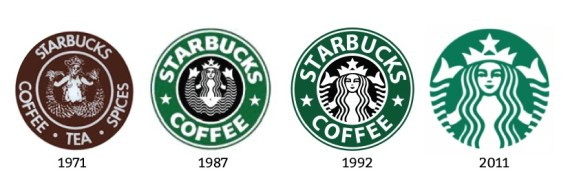

In [27]:
# Load image from local storage
Image(filename="starbuckslogos-1.jpg", width=700, height=200)

## Dataset
The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed
* Here is the schema and explanation of each variable in the files:

### portfolio.json

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

### profile.json

* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

### transcript.json

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [1]:
%load_ext lab_black

In [2]:
# This library is to work with Data Frames
import pandas as pd

# This library is to work with vectors
import numpy as np

# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some plotting parameters
from matplotlib import rcParams

# To supplies classes for manipulating dates and times
import datetime

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

# This library is to create displays
from IPython.display import Image


# Calling reporting functions from util_reporting
from util_reporting import (
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    boxplot_viz,
    histogram_multiple_viz,
    countplot_pointplot_viz,
)

# Calling reporting functions from util_data_cleaning
from util_data_cleaning import (
    missing_data_finder,
)

# Calling feature engineering functions from util_feature_engineering
from util_feature_engineering import (
    calculating_zscore,
    creating_date_columns,
)


%matplotlib inline
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

# Setting a universal figure size<
rcParams["figure.figsize"] = 8, 6

### Uploading data sets:

In [4]:
# Transaction CSVs
transcript = pd.read_csv("transcript.csv")
profile = pd.read_csv("profile.csv")
portfolio = pd.read_csv("portfolio.csv")

### The First Looking to Data Set:
* I called `df_first_look` from `util_reporting.py`.
* This function returns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [9]:
df_first_look(transcript)

First 5 rows of dataframe:
--------------------------
                              person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  

Last 5 rows of dataframe:
--------------------------
                                   person        event              value  time
102768  b784cc0181ee49f59ffca05ab571872a  transaction   {'amount': 1.28}   288
102769  6c2504661149460d8a44d95e99ca3186 

In [10]:
df_first_look(profile)

First 5 rows of dataframe:
--------------------------
   gender  age                                id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

Last 5 rows of dataframe:
--------------------------
       gender  age                                id  became_member_on   income
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604  54000.0
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713  72000.0
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126  73000.0
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307  50000.0
16999      F   62  e4052622e5ba45a8b96b

In [11]:
df_first_look(portfolio)

First 5 rows of dataframe:
--------------------------
    reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                                id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  

Last 5 rows of dataframe:
--------------------------
    reward                              channels  difficulty  duration  \
5       3  ['web', 'email', 'mobile', 'social']           7 